# Генерация тестов
<p style="text-indent: 25px;">Тексты и шаблоны для тестов генерировались в функции `TestingManager::prepareContext` по следующему принципу: перебирались все возможные комбинации размера текста, мощности алфавита и размера шаблонов - для каждой такой тройки считалось случайное смещение offset, далее переберились все возможные варианты количества символов подстановки в шаблоне и генерировались шаблоны с одним и тем же смещением, таким образом для каждой тройки генерировалось по сути 5 копий одного шаблона, различающихся только количеством символов подстановки в них.</p>

# О прогоне и результатах тестов
<p style="text-indent: 25px;">Каждый алгоритм тестировался на всех возможных тестах(2 варианта размера текста * 2 варианта мощности алфавика * 5 вариантов количества символов подстановки) по 50 раз, в ходе тестов подсчитывались <b><em>время выполнения</em></b> и <b><em>количество посимвольных сравнений</em></b>, в результате были получены 3 выходных таблицы с очевидными названными столбцами. </p>

# Выводы по результатам тестов
1. Легко видеть, что наивный поиск абсолютно во всех случаях имеет меньшее количество посимвольных сравнений, чем КМП.
2. Также почти на всех тестах на наивный поиск тратится меньше вычислительного времени, что логично, ведь КМП вынужден достаточно долго вычислять префикс-функцию, в то время асимптотика алгоритма наивного поиска($O((n-m)m)$) стремится к линейной при m, достаточно малых относильно n, что верно в нашем случае (m = 0.1%-30% n, 30% это достаточно много, однако любое m > 3% возможно только на текстах длины 10000, а это достаточно небольшие тексты), кроме того, этому способствует первый факт.
3. Исключением из предыдущего наблюдения являются тесты с шаблонами без символов подстановки, здесь КМП стабильно отрабатывает быстрее наивного алгоритма, что логично - последний хоть и имеет на наших диапазонах неплохую скорость работы, однако КМП имеет гарантированно линейную сложность, а значит, когда ему не нужно разбивать строку по символам подстановки и несколько раз считать префикс-функцию - он всё же быстрее, особенно на длинных текстах.
4. По мере роста размера шаблона и с увеличением мощности алфавита количество сравнений у наивного поиска уменьшается - с увеличением этих параметров выше шанс breakнуться.
5. Стандартный и "уточнённый" алгоритмы КМП ведут себя очень похоже, с чуть большим временем выполнения в среднем у оптимального алгоритма - видимо польза уточнённых граней не перекрывает время на их подсчёт, по крайней мере на наших диапазонах размеров.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
algorithms = [
    pd.read_csv('Logs/NaiveSearch_Results.csv'),
    pd.read_csv('Logs/BaseKMP_Results.csv'),
    pd.read_csv('Logs/CoolKMP_Results.csv')
]

In [3]:
def get_algorithm_name(ind):
    if ind == 0:
        return 'Naive Search'
    elif ind == 1:
        return 'Base KMP'
    else:
        return 'Cool KMP'

def get_correct_ending(number):
    if number == 0 or number == 5:
        return 'символов'
    elif number == 1:
        return 'символ'
    else:
        return 'символа'



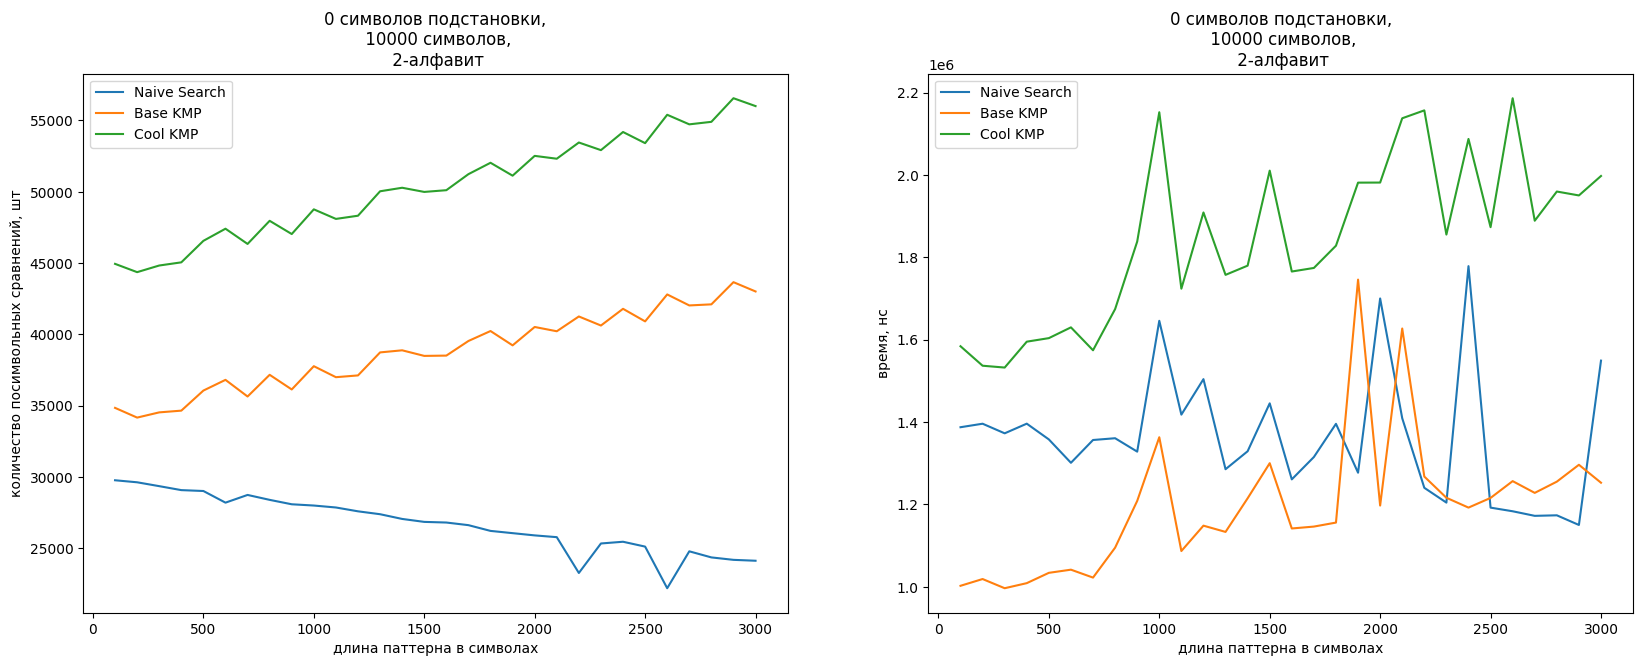

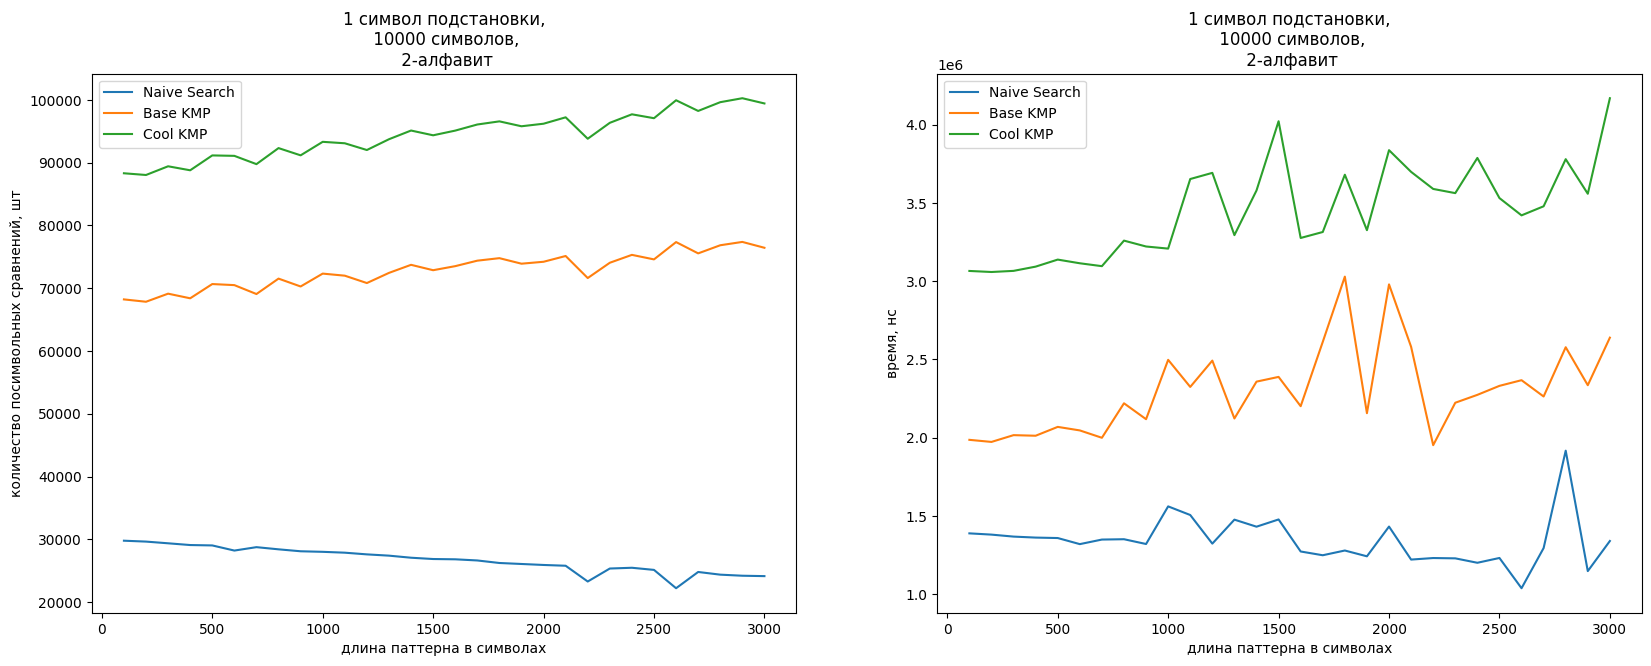

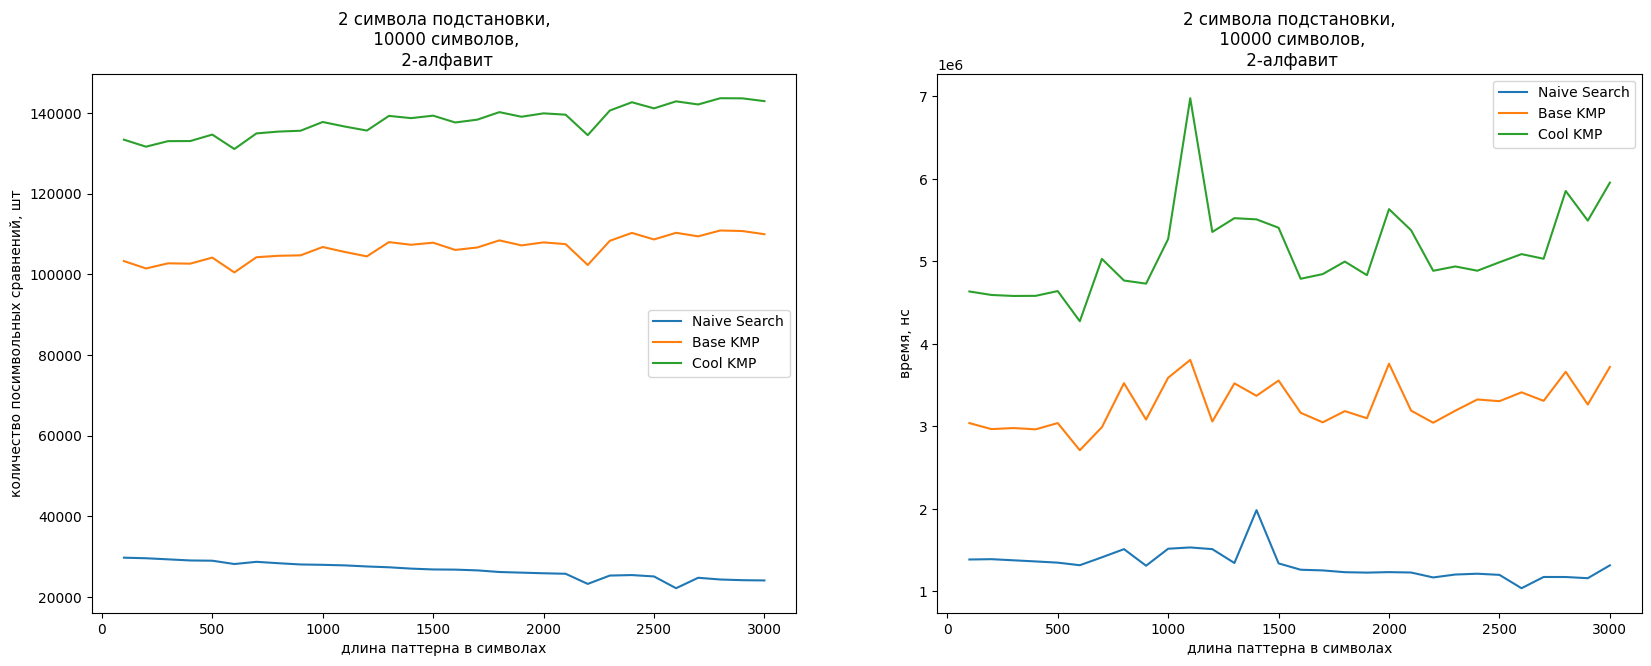

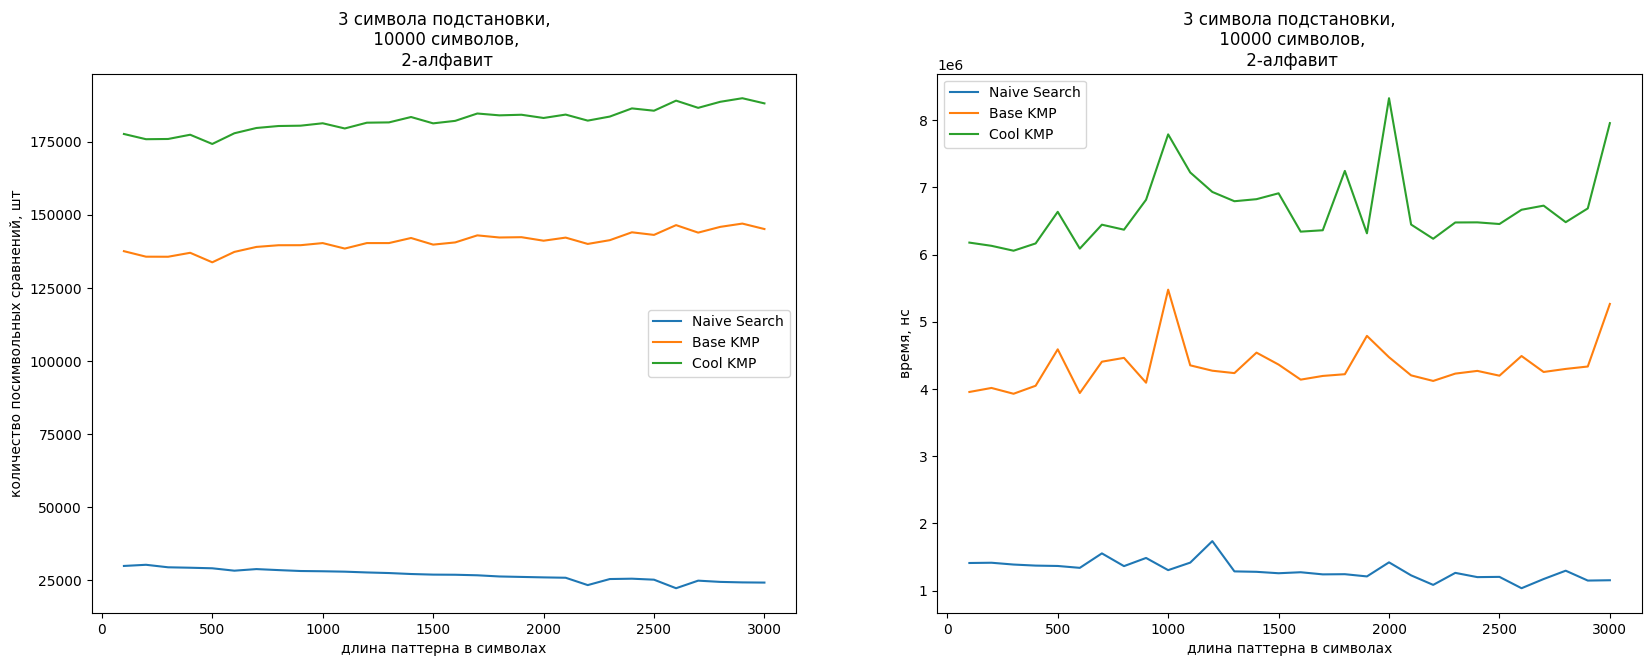

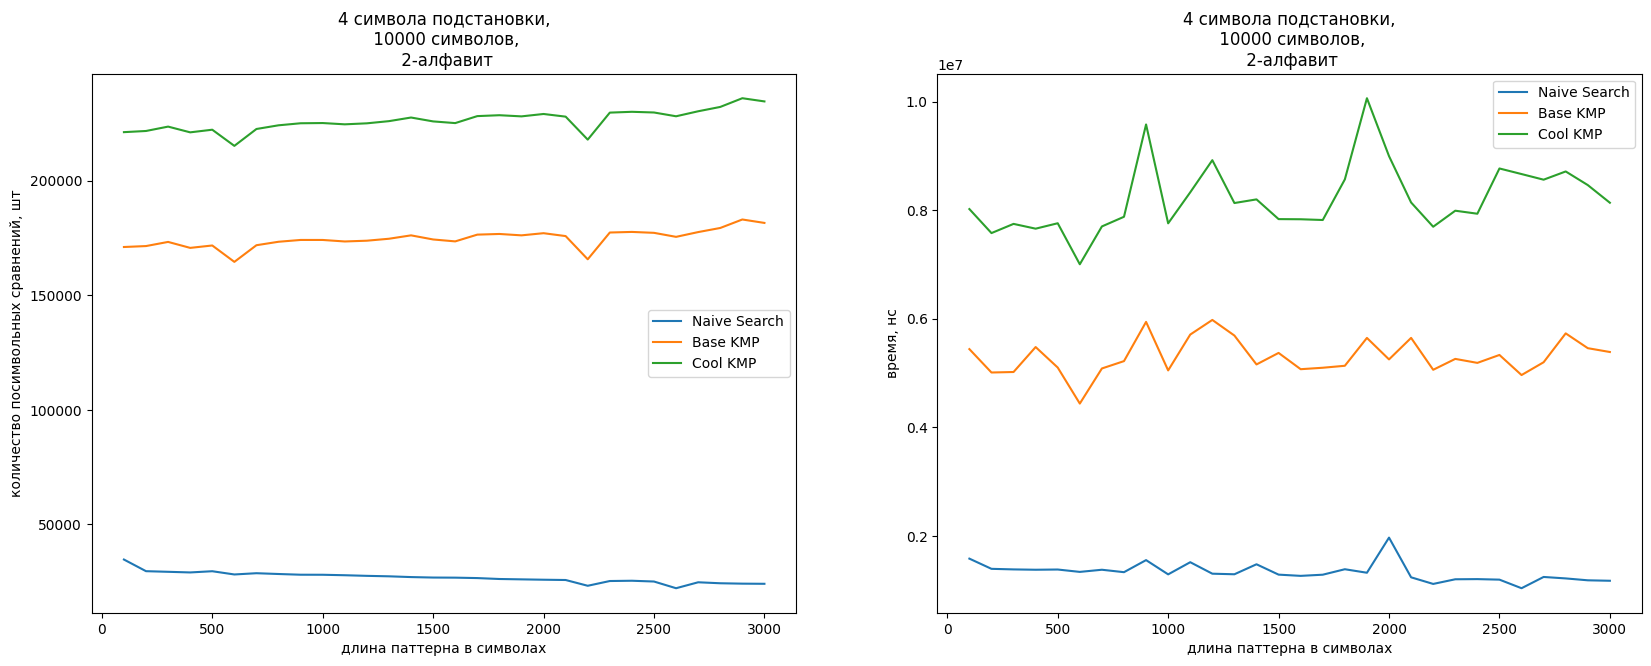

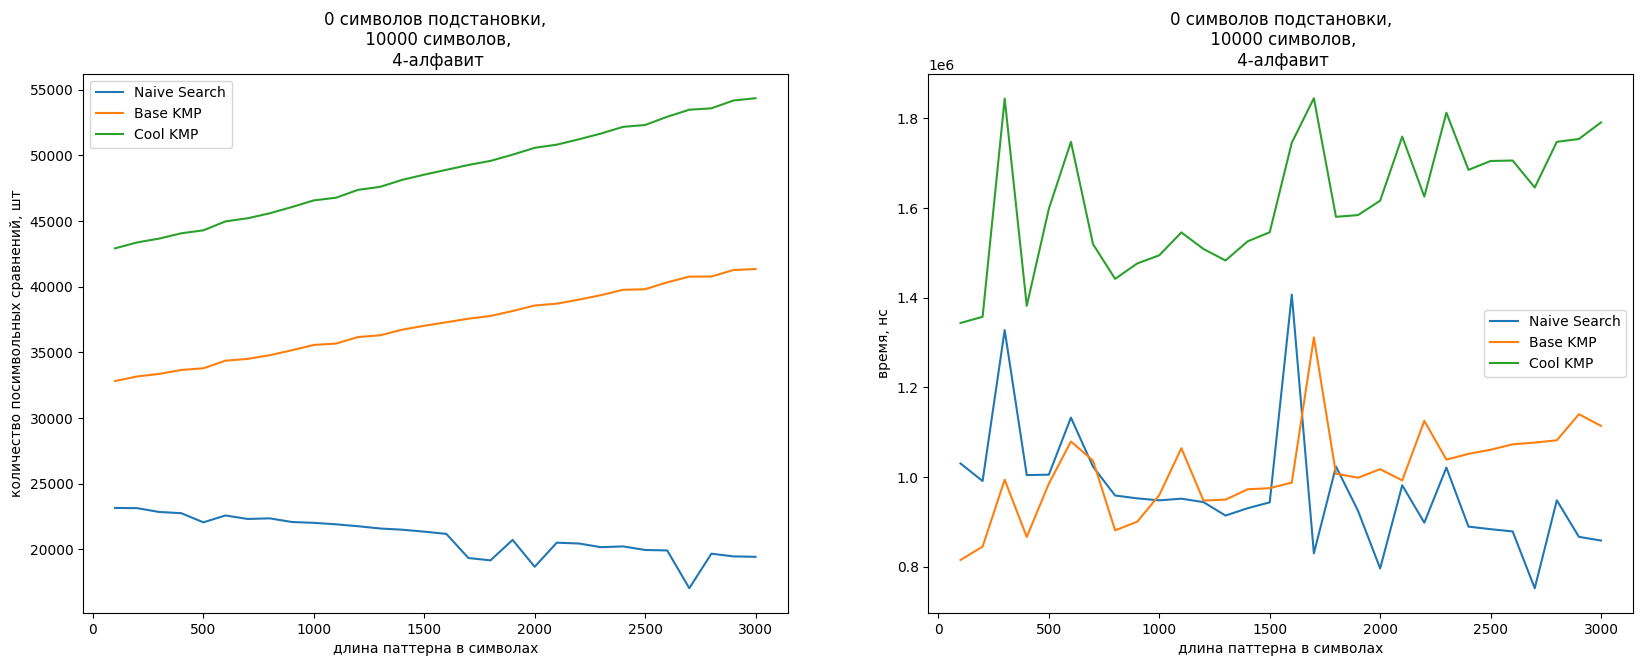

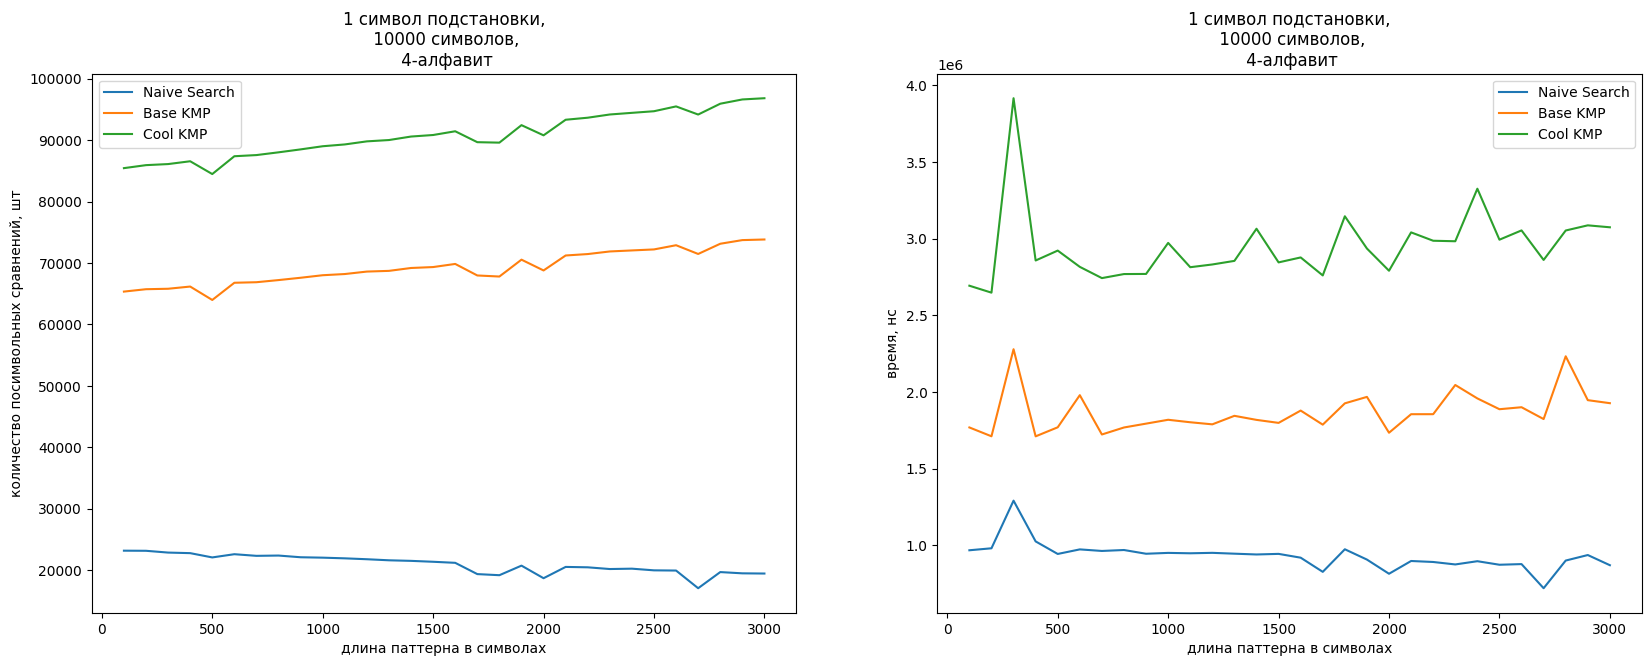

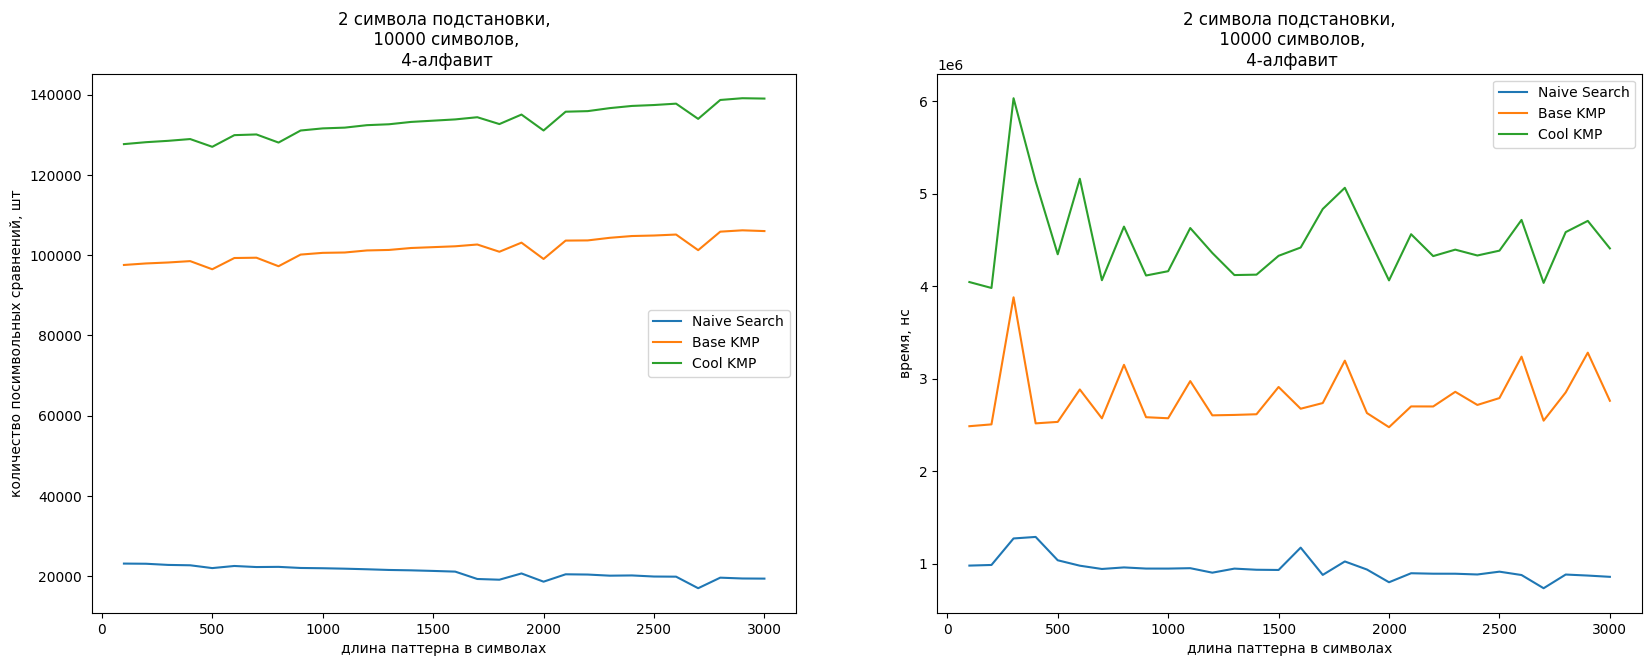

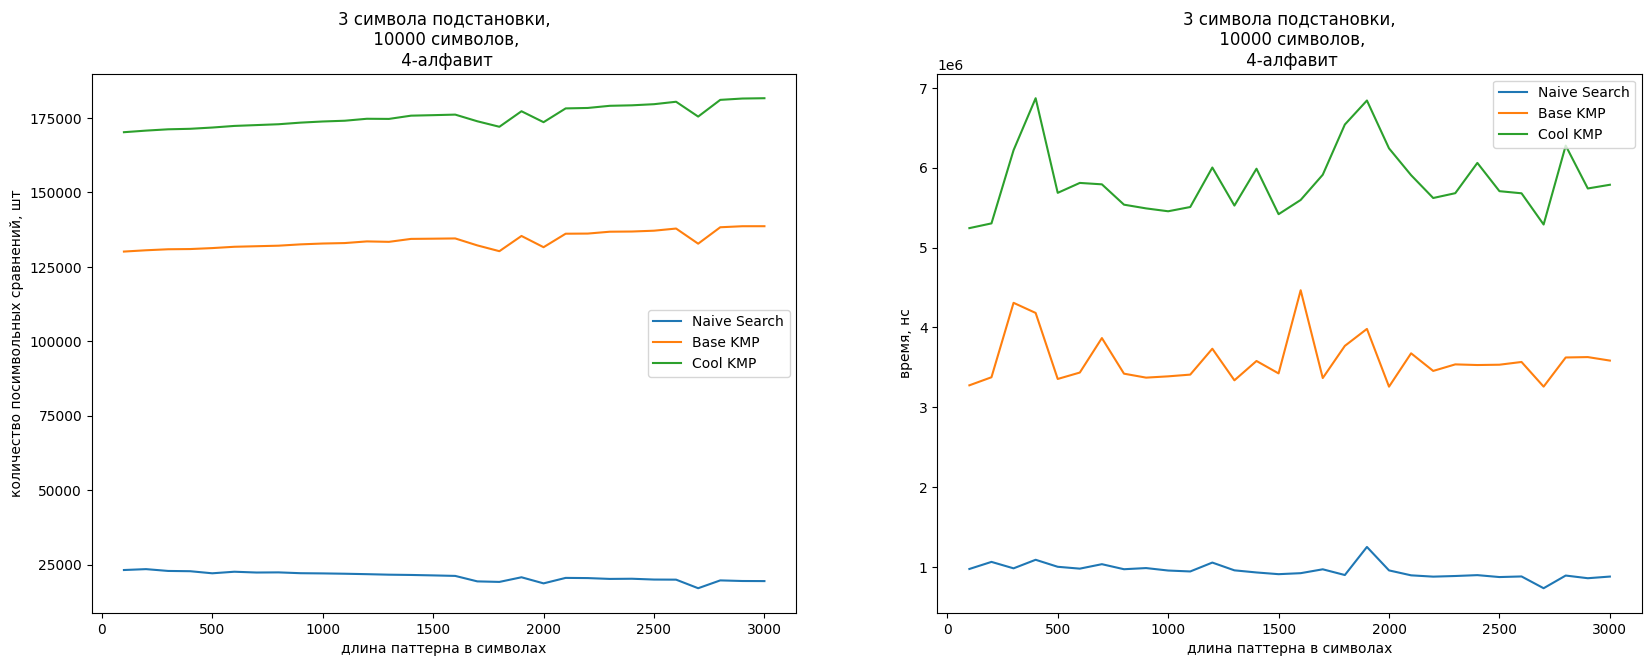

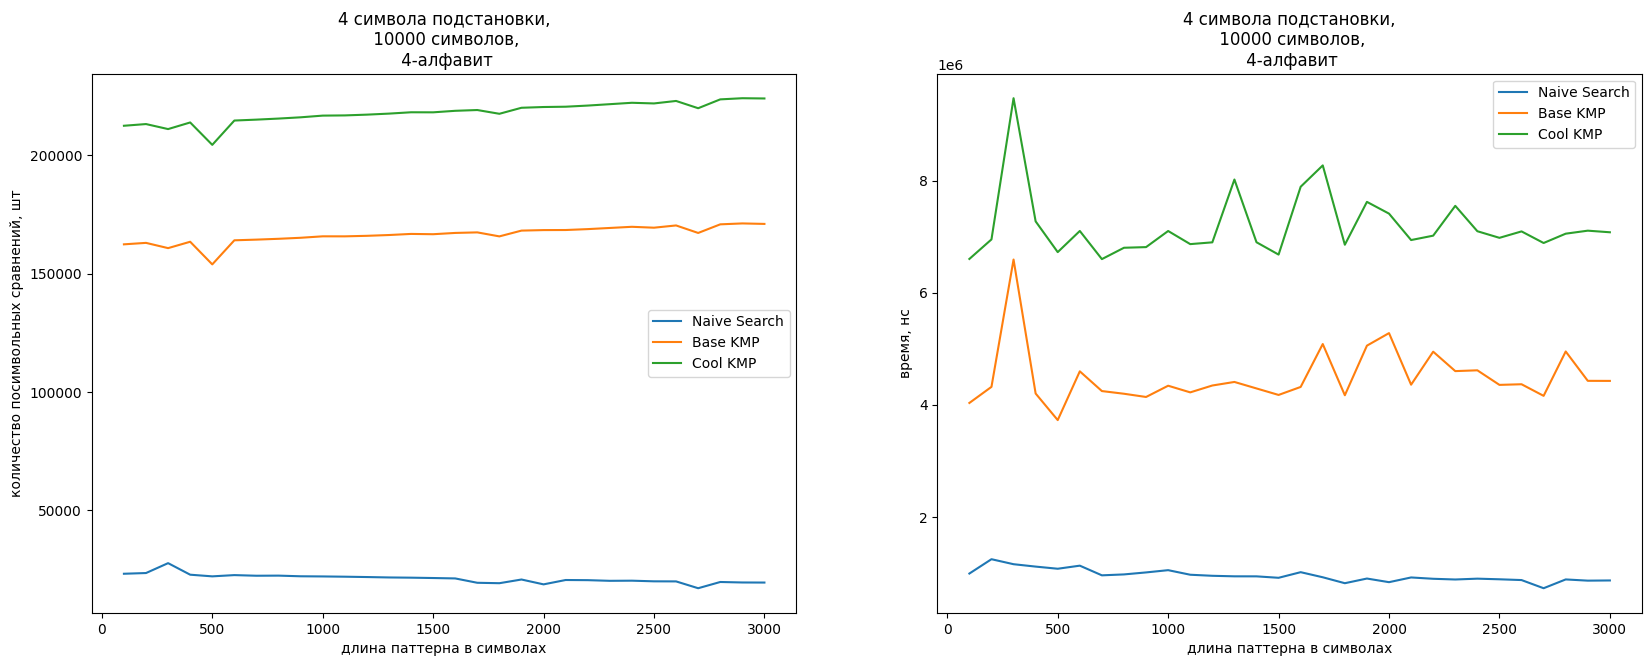

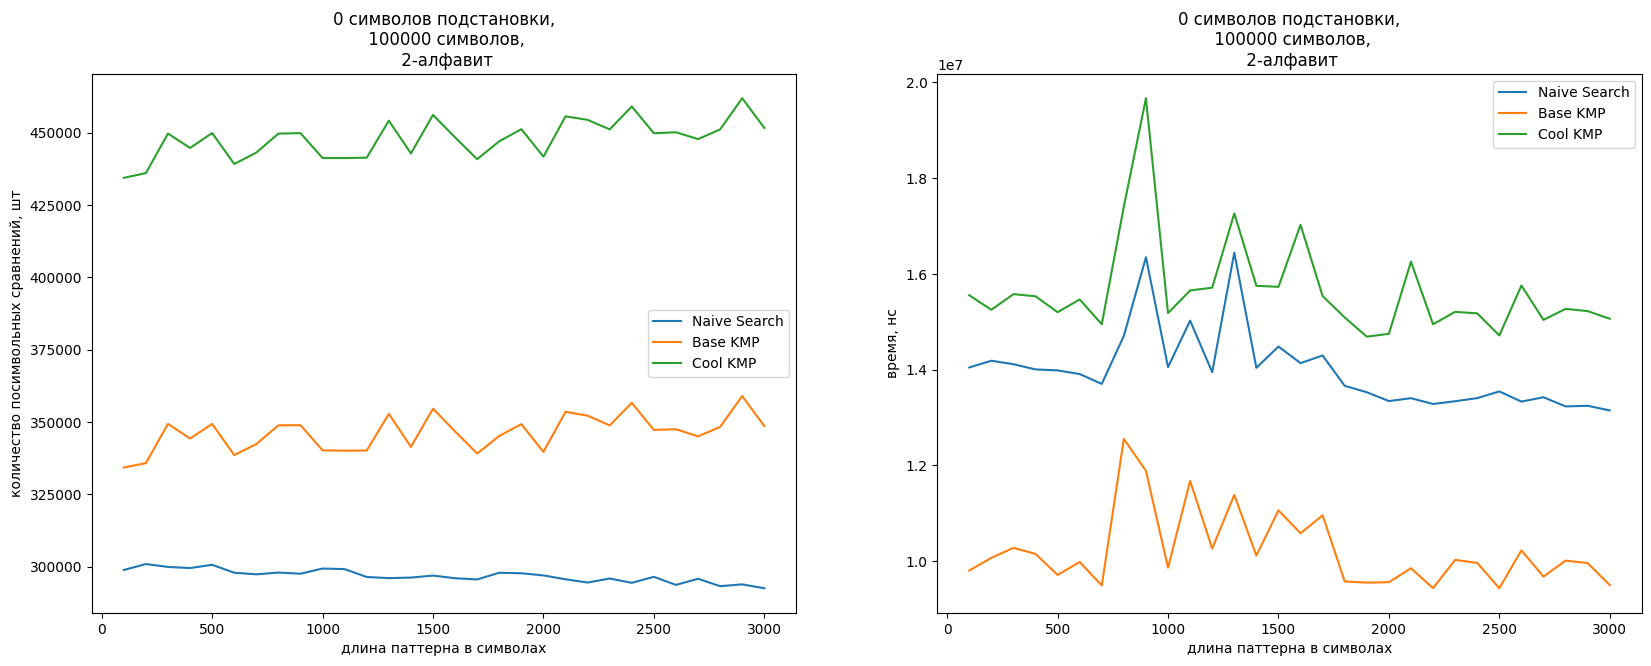

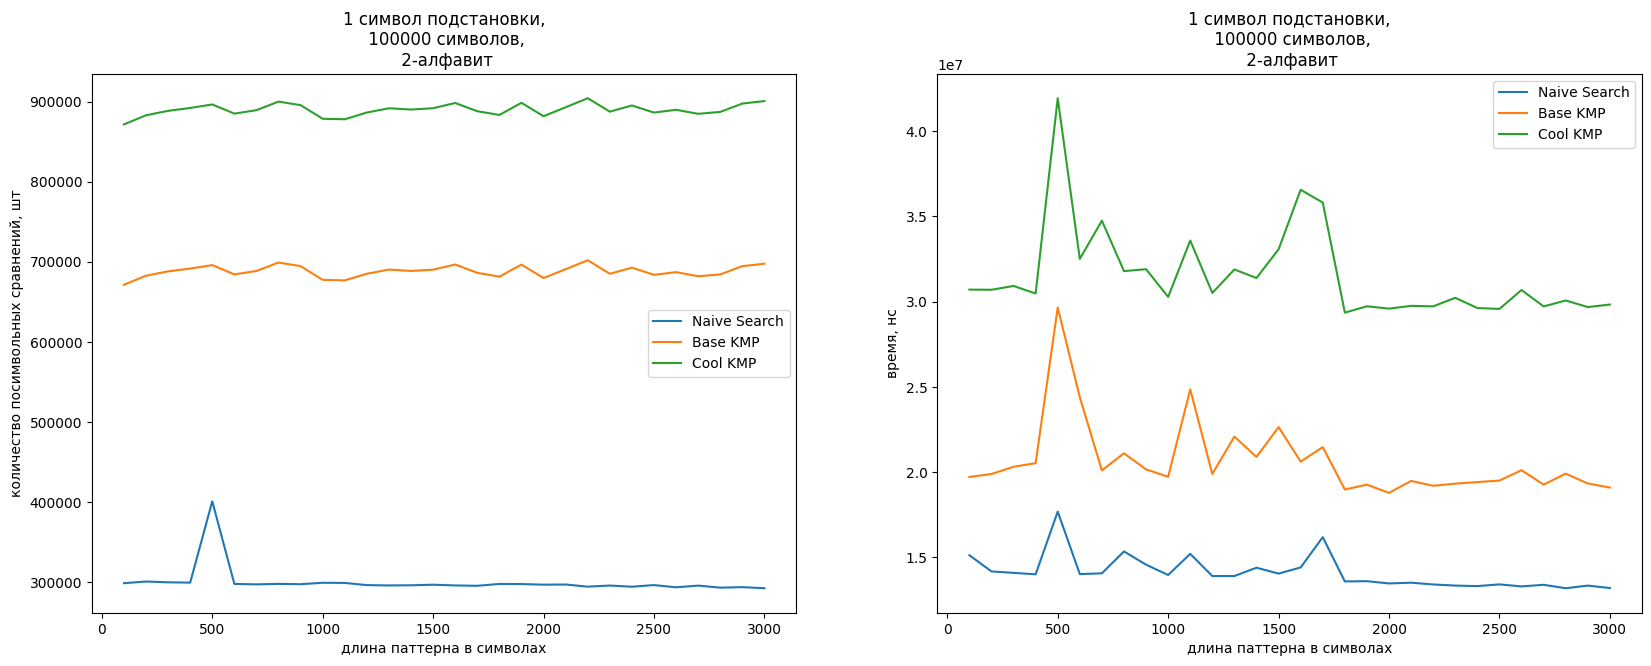

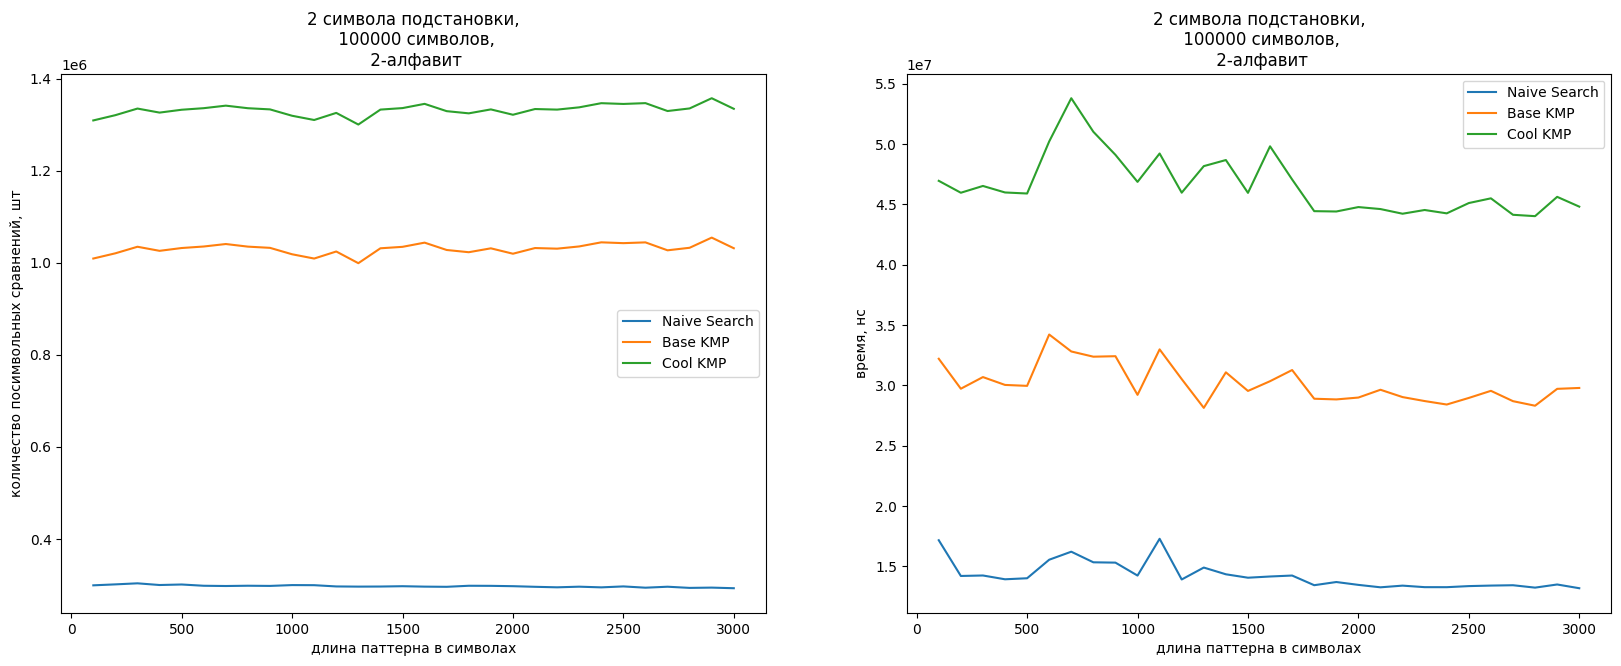

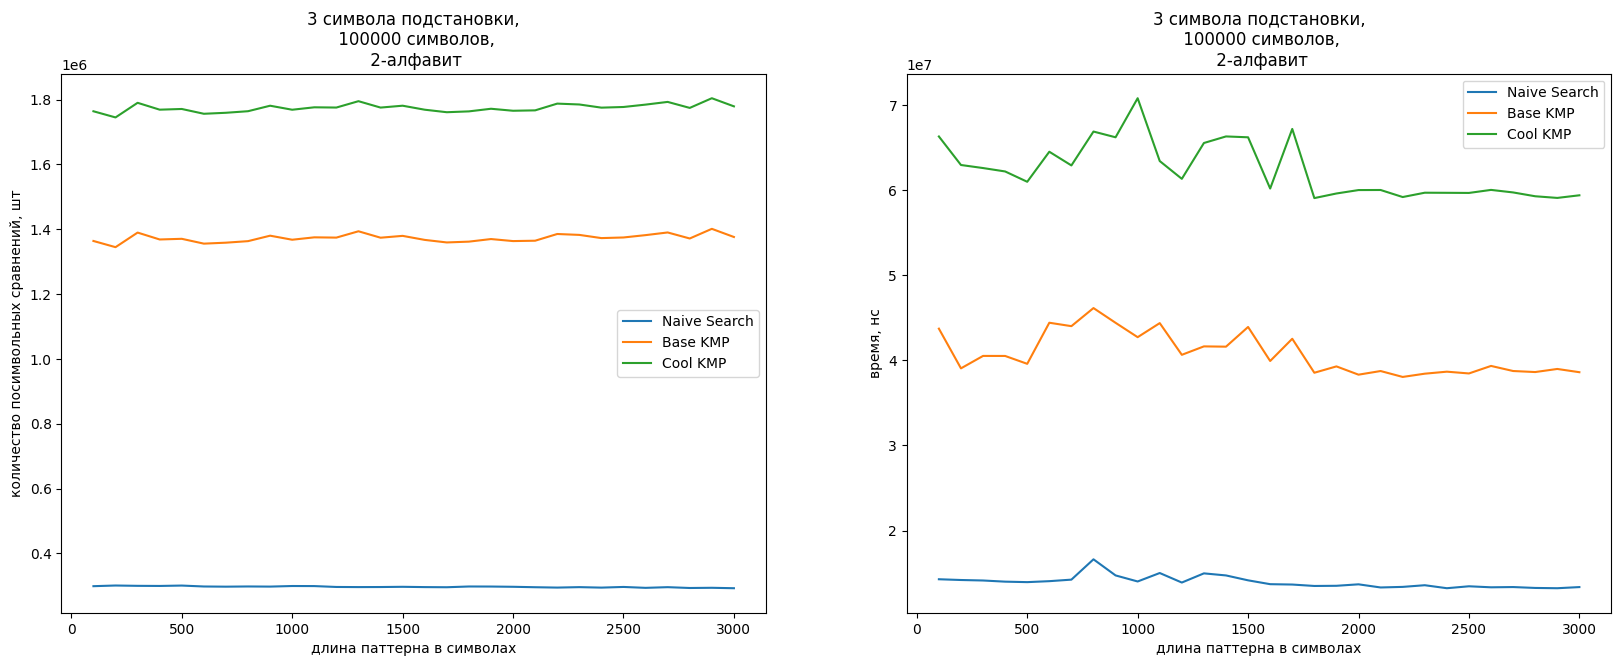

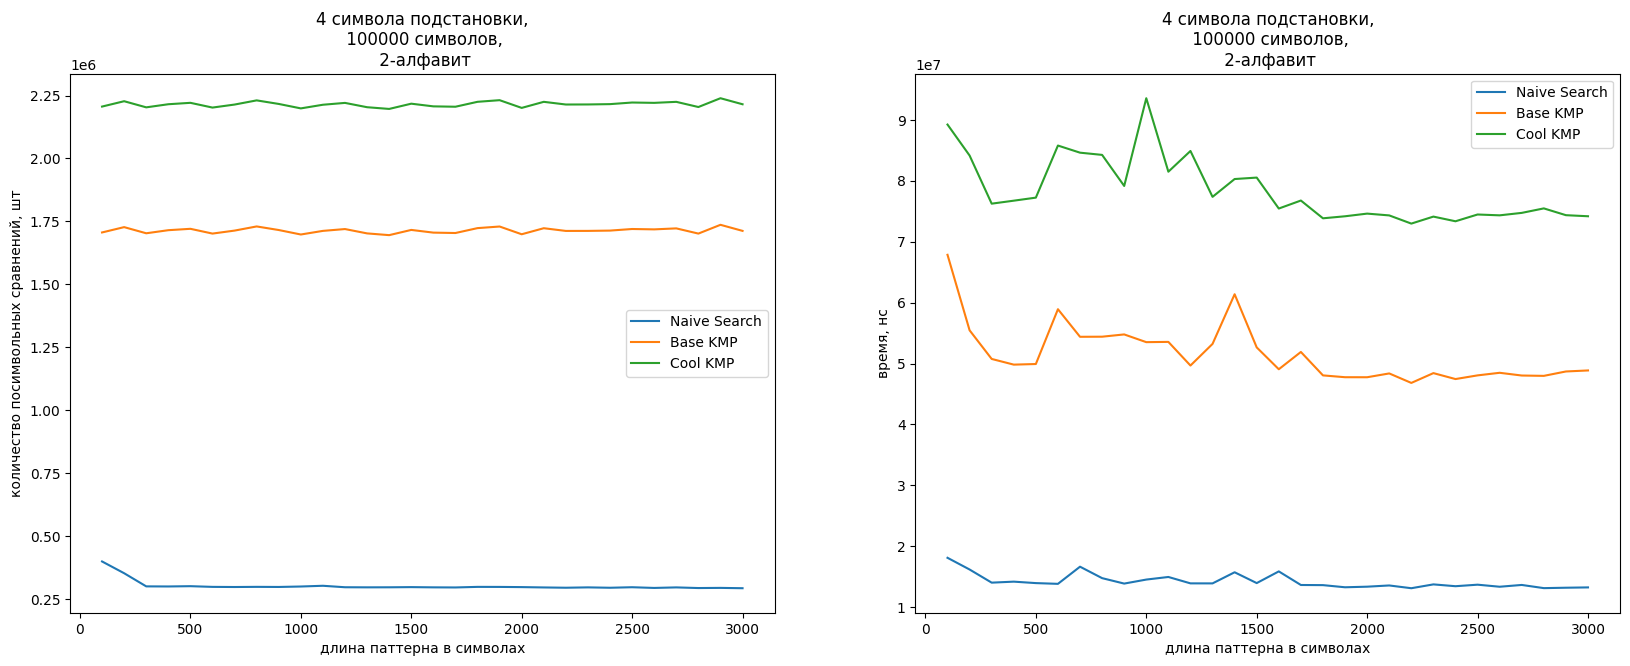

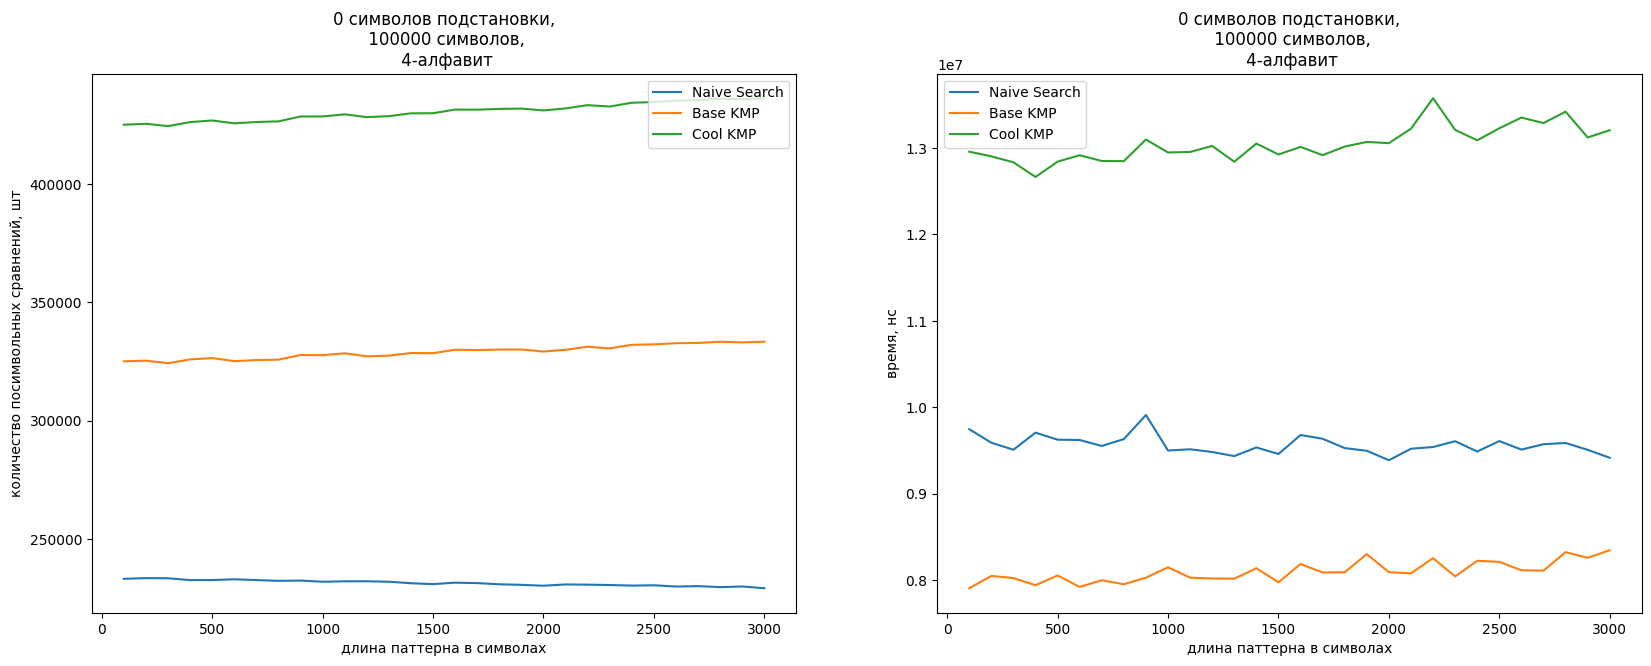

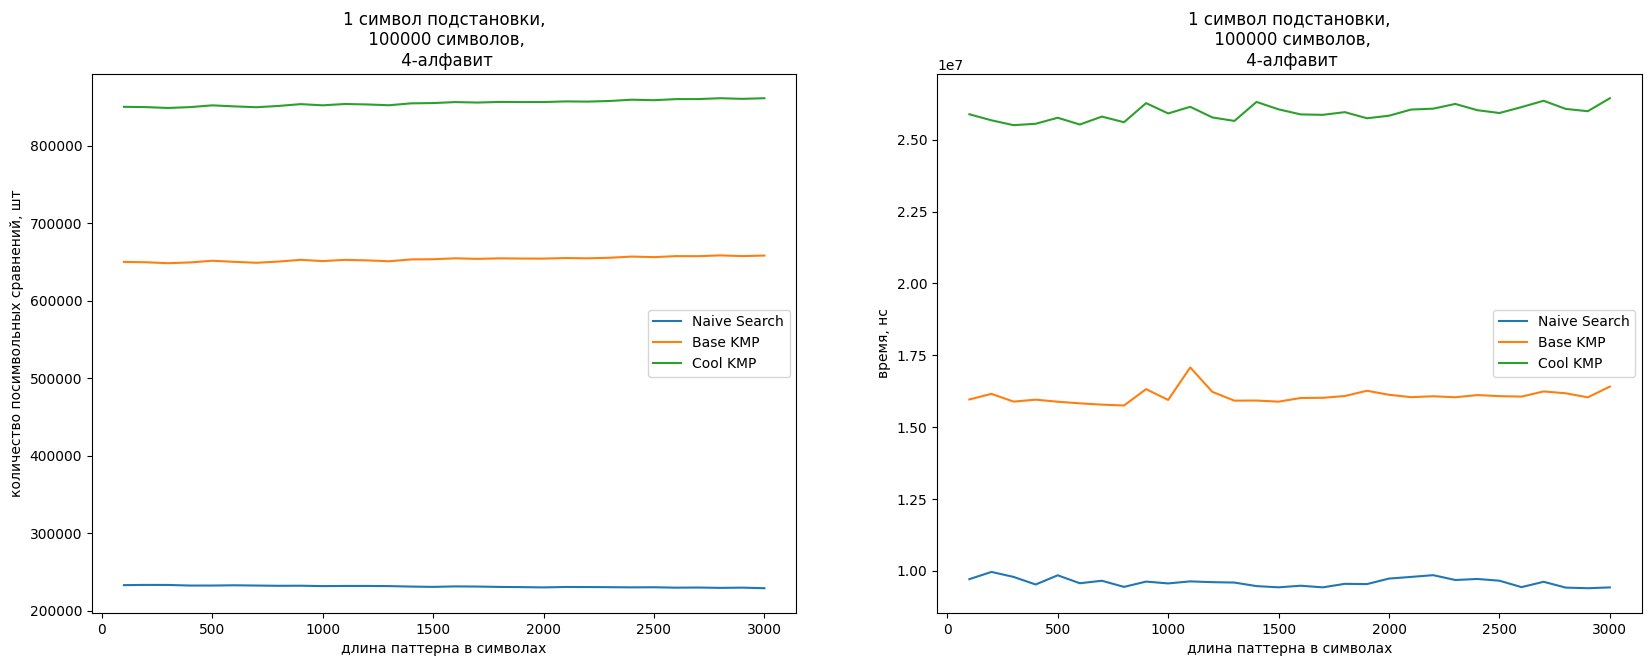

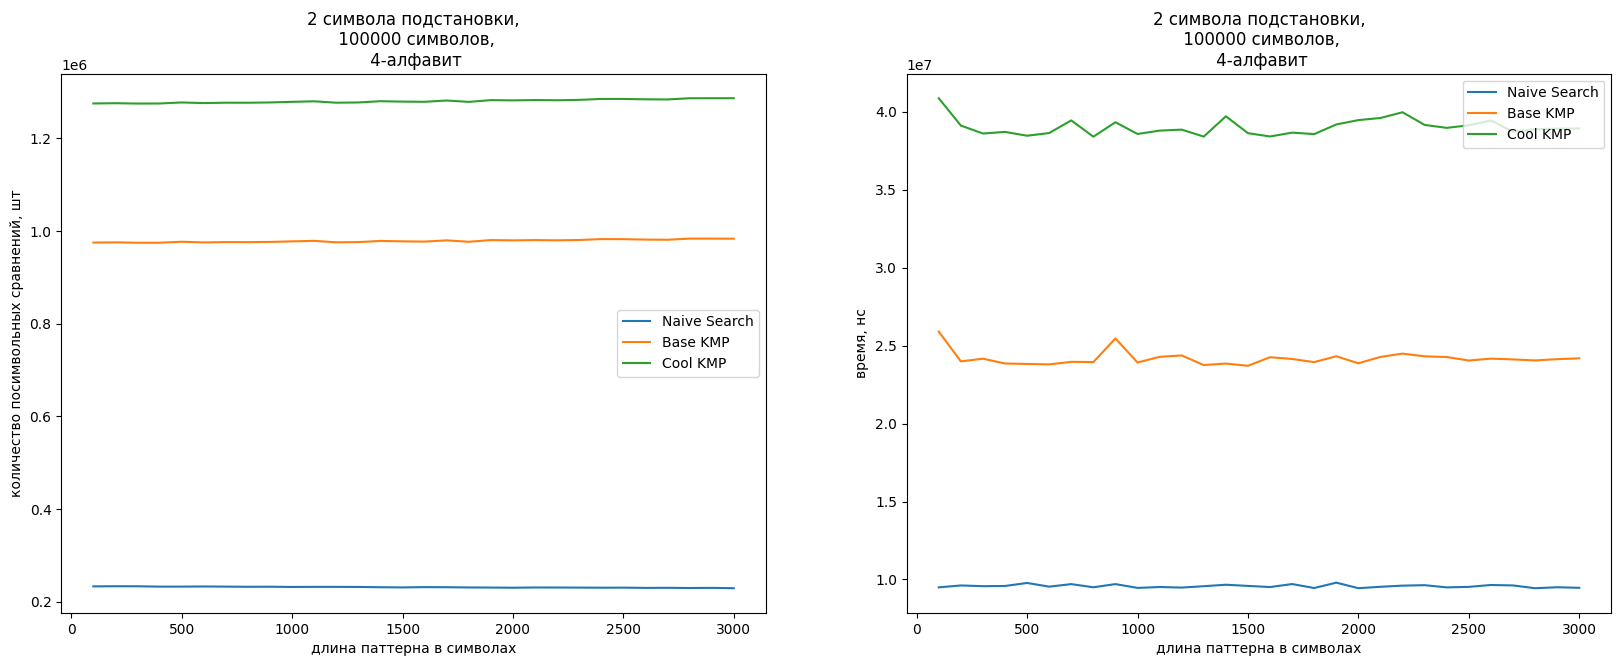

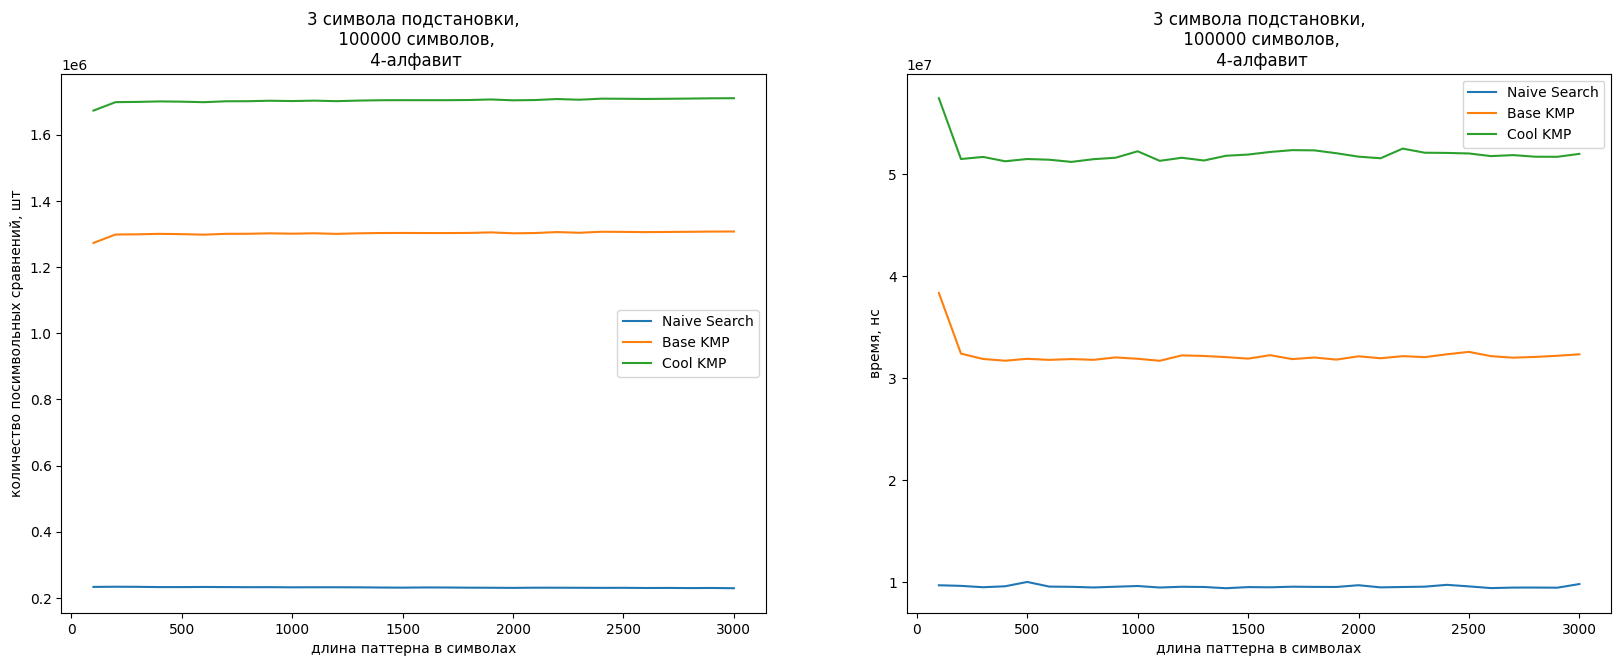

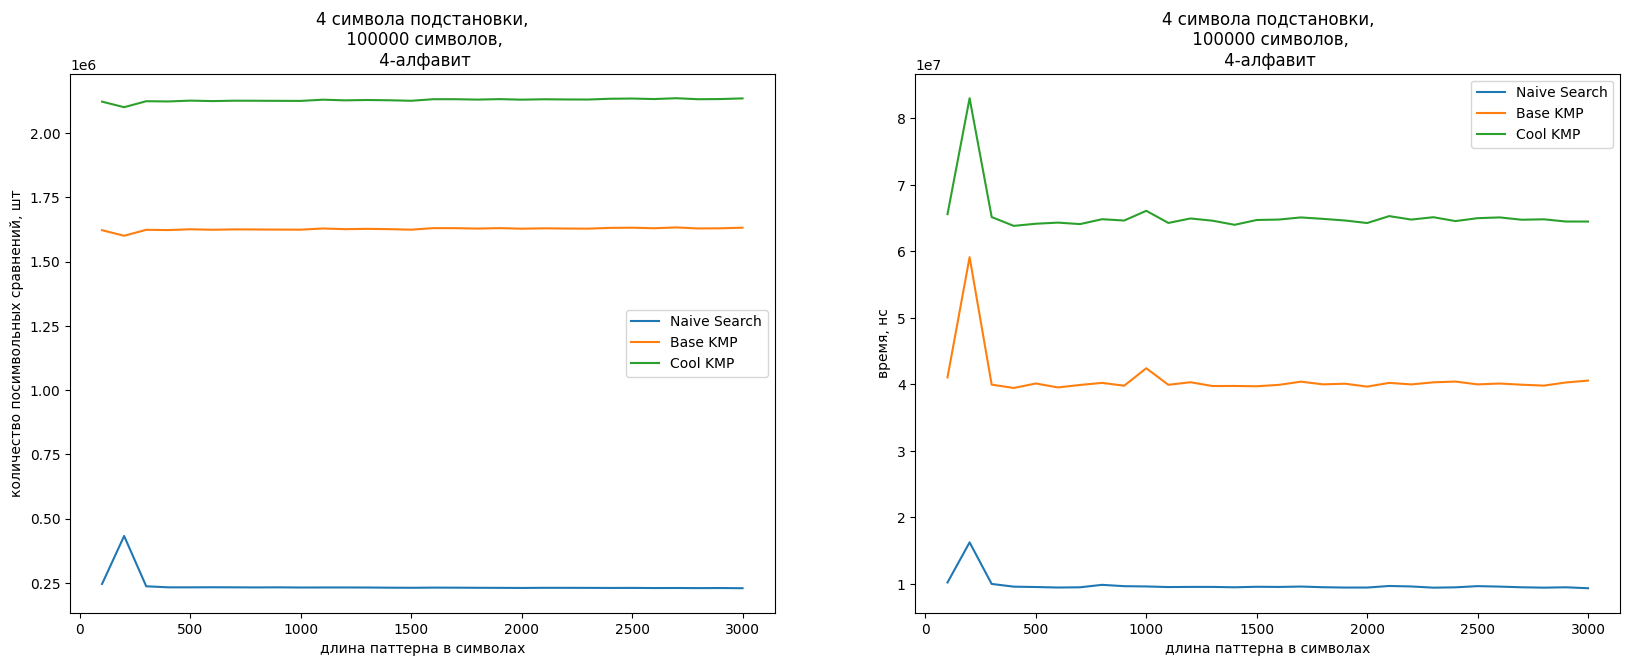

In [5]:
for text_size in [10000, 100000]:
    for alphabet_size in [2, 4]:
        for universal_symbols_amount in range(5):
            fig, ax = plt.subplots(1, 2, figsize=(20, 7))
            ax[0].set_ylabel('количество посимвольных сравнений, шт')
            ax[1].set_ylabel('время, нс')

            for i, algorithm in enumerate(algorithms):
                ax[0].plot(algorithm[(algorithm['UniversalSymbolsAmount'] == universal_symbols_amount) & (algorithm['TextSize'] == text_size) & (algorithm['AlphabetSize'] == alphabet_size)]['PatternSize'],
                    algorithm[(algorithm['UniversalSymbolsAmount'] == universal_symbols_amount) & (algorithm['TextSize'] == text_size) & (algorithm['AlphabetSize'] == alphabet_size)]['Comparisons'],label=get_algorithm_name(i))

                ax[1].plot(algorithm[(algorithm['UniversalSymbolsAmount'] == universal_symbols_amount) & (algorithm['TextSize'] == text_size) & (algorithm['AlphabetSize'] == alphabet_size)]['PatternSize'],
                    algorithm[(algorithm['UniversalSymbolsAmount'] == universal_symbols_amount) & (algorithm['TextSize'] == text_size) & (algorithm['AlphabetSize'] == alphabet_size)]['TimeNs'],label=get_algorithm_name(i))

            for i in range(2):
                ax[i].set_title(f'{universal_symbols_amount} {get_correct_ending(universal_symbols_amount)} подстановки,\n {text_size} символов,\n {alphabet_size}-алфавит')
                ax[i].set_xlabel('длина паттерна в символах')
                # ax[i].xaxis.set_ticks(np.arange(100, 3100, 200))
                ax[i].legend()

plt.show()